In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

In [50]:
movies=pd.read_csv("my_movies.csv",sep=",")
movies = movies.iloc[:,[0,1,2,3,4]]
movies
### Considering only the transactions, i.e the textual transactions.

,V1,V2,V3,V4,V5
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2
1,Gladiator,Patriot,Braveheart,NaN,NaN
2,LOTR1,LOTR2,NaN,NaN,NaN
3,Gladiator,Patriot,Sixth Sense,NaN,NaN
4,Gladiator,Patriot,Sixth Sense,NaN,NaN
5,Gladiator,Patriot,Sixth Sense,NaN,NaN
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN
7,Gladiator,Patriot,NaN,NaN,NaN
8,Gladiator,Patriot,Sixth Sense,NaN,NaN
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN


In [8]:
#### Imputation to convert the nan values to 0's##
movies.iloc[:,2:5] = movies.iloc[:,2:5].apply(lambda x:x.fillna(0))
movies

,V1,V2,V3,V4,V5
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2
1,Gladiator,Patriot,Braveheart,0,0
2,LOTR1,LOTR2,0,0,0
3,Gladiator,Patriot,Sixth Sense,0,0
4,Gladiator,Patriot,Sixth Sense,0,0
5,Gladiator,Patriot,Sixth Sense,0,0
6,Harry Potter1,Harry Potter2,0,0,0
7,Gladiator,Patriot,0,0,0
8,Gladiator,Patriot,Sixth Sense,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,0


In [7]:
X = pd.get_dummies(movies[['V1','V2','V3','V4','V5']])
X

,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_0,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_0,V4_Green Mile,V5_0,V5_LOTR2
0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1
1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
2,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
6,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
7,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0
8,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
9,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0


In [9]:
####################################Creating model with dummies of NAN values #################3

x_dummies = X.iloc[:,[9,14,16]]
x_dummies 

,V3_0,V4_0,V5_0
0,0,0,0
1,0,1,1
2,1,1,1
3,0,1,1
4,0,1,1
5,0,1,1
6,1,1,1
7,1,1,1
8,0,1,1
9,0,0,1


In [11]:
### Running Apriori algorithm
##With support=0,005 and max_len=2
frequent_items = apriori(x_dummies,min_support = 0.005, max_len =2 , use_colnames = True )
frequent_items.sort_values('support', ascending = False, inplace = True)
frequent_items

,support,itemsets
2,0.9,(V5_0)
1,0.8,(V4_0)
5,0.8,"(V4_0, V5_0)"
0,0.3,(V3_0)
3,0.3,"(V4_0, V3_0)"
4,0.3,"(V5_0, V3_0)"


In [12]:
## Building rules
## with min_threshold =1
rules_dummies = association_rules(frequent_items, metric = 'lift', min_threshold = 1)
rules_dummies.sort_values('lift',ascending =False,inplace =True)
rules_dummies

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(V3_0),(V4_0),0.3,0.8,0.3,1.000000,1.250000,0.06,inf
2,(V4_0),(V3_0),0.8,0.3,0.3,0.375000,1.250000,0.06,1.12
0,(V4_0),(V5_0),0.8,0.9,0.8,1.000000,1.111111,0.08,inf
1,(V5_0),(V4_0),0.9,0.8,0.8,0.888889,1.111111,0.08,1.80
4,(V5_0),(V3_0),0.9,0.3,0.3,0.333333,1.111111,0.03,1.05
5,(V3_0),(V5_0),0.3,0.9,0.3,1.000000,1.111111,0.03,inf


In [34]:
############# To eliminate redudancy in rules########

def to_list(i):
    return(sorted(i))
to_list(i)

['V3_0', 'V4_0']

In [18]:
rules_add = rules_dummies.antecedents.apply(to_list) + rules_dummies.consequents.apply(to_list)
rules_add = rules_add.apply(sorted)
rules_add 

3    [V3_0, V4_0]
2    [V3_0, V4_0]
0    [V4_0, V5_0]
1    [V4_0, V5_0]
4    [V3_0, V5_0]
5    [V3_0, V5_0]
dtype: object

In [19]:
rules_set = list(rules_add)
rules_set

[['V3_0', 'V4_0'],
 ['V3_0', 'V4_0'],
 ['V4_0', 'V5_0'],
 ['V4_0', 'V5_0'],
 ['V3_0', 'V5_0'],
 ['V3_0', 'V5_0']]

In [20]:
unique_rules = [list(m) for m in set(tuple(i) for i in rules_set)]
index_rules = []

In [21]:
for i in unique_rules:
    index_rules.append(rules_set.index(i))
print(i)

['V3_0', 'V4_0']


In [22]:
### rules without redudancy##
rules_without_redud = rules_dummies.iloc[index_rules,:]
rules_without_redud

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(V5_0),(V3_0),0.9,0.3,0.3,0.333333,1.111111,0.03,1.05
0,(V4_0),(V5_0),0.8,0.9,0.8,1.000000,1.111111,0.08,inf
3,(V3_0),(V4_0),0.3,0.8,0.3,1.000000,1.250000,0.06,inf


In [23]:
### sorting
rules_without_redud.sort_values('lift', ascending = False, inplace =True)
rules_without_redud

C:\Users\sagri\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(V3_0),(V4_0),0.3,0.8,0.3,1.000000,1.250000,0.06,inf
4,(V5_0),(V3_0),0.9,0.3,0.3,0.333333,1.111111,0.03,1.05
0,(V4_0),(V5_0),0.8,0.9,0.8,1.000000,1.111111,0.08,inf


In [24]:
### Support and confidence
Support = rules_without_redud['support']
confidence = rules_without_redud['confidence']

Text(0, 0.5, 'Confidence')

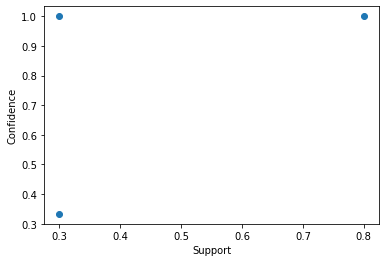

In [26]:
plt.scatter(Support,confidence);plt.xlabel("Support");plt.ylabel("Confidence")

In [27]:
############################# Model with other than Zero values#####
x_without_dum = X.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12,13,15,17]]
x_without_dum 

,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1
1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0


In [29]:
#### Applying Apriori with support = 0.005 and max length =2
frequents_item1 = apriori(x_without_dum, min_support=0.005, max_len = 2, use_colnames=True)
frequents_item1.sort_values('support',ascending = False, inplace = True)
frequents_item1

,support,itemsets
0,0.6,(V1_Gladiator)
8,0.6,(V2_Patriot)
15,0.6,"(V1_Gladiator, V2_Patriot)"
12,0.4,(V3_Sixth Sense)
17,0.4,"(V1_Gladiator, V3_Sixth Sense)"
32,0.4,"(V3_Sixth Sense, V2_Patriot)"
24,0.2,"(V1_Sixth Sense, V4_Green Mile)"
3,0.2,(V1_Sixth Sense)
13,0.2,(V4_Green Mile)
25,0.1,"(V1_Sixth Sense, V5_LOTR2)"


In [30]:
###Building rules with minimum threshold = 1
rules_without = association_rules(frequents_item1, metric='lift', min_threshold =1)
rules_without.sort_values('lift',ascending = False, inplace =True)
rules_without

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(V3_Gladiator),(V2_LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
29,(V3_Harry Potter1),(V5_LOTR2),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
38,(V2_LOTR2),(V1_LOTR1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
17,(V3_Harry Potter1),(V2_LOTR1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
16,(V2_LOTR1),(V3_Harry Potter1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
11,(V2_LOTR),(V3_Gladiator),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
21,(V2_LOTR1),(V5_LOTR2),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
28,(V5_LOTR2),(V3_Harry Potter1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
20,(V5_LOTR2),(V2_LOTR1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
39,(V1_LOTR1),(V2_LOTR2),0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [33]:
###Eliminate the reducdancy####
def to_list_out(i):
    return(sorted(i))
to_list_out(i)    

['V3_0', 'V4_0']

In [36]:
rules_out_add = rules_without.antecedents.apply(to_list_out)+rules_without.consequents.apply(to_list_out)
rules_out_add = rules_out_add.apply(sorted)
rules_out_add 

10                 [V2_LOTR, V3_Gladiator]
29            [V3_Harry Potter1, V5_LOTR2]
38                    [V1_LOTR1, V2_LOTR2]
17            [V2_LOTR1, V3_Harry Potter1]
16            [V2_LOTR1, V3_Harry Potter1]
11                 [V2_LOTR, V3_Gladiator]
21                    [V2_LOTR1, V5_LOTR2]
28            [V3_Harry Potter1, V5_LOTR2]
20                    [V2_LOTR1, V5_LOTR2]
39                    [V1_LOTR1, V2_LOTR2]
32    [V1_Harry Potter1, V2_Harry Potter2]
33    [V1_Harry Potter1, V2_Harry Potter2]
30      [V1_Sixth Sense, V3_Harry Potter1]
31      [V1_Sixth Sense, V3_Harry Potter1]
27       [V3_Harry Potter1, V4_Green Mile]
26       [V3_Harry Potter1, V4_Green Mile]
25           [V3_Gladiator, V4_Green Mile]
24           [V3_Gladiator, V4_Green Mile]
37               [V1_Sixth Sense, V2_LOTR]
34              [V1_Sixth Sense, V2_LOTR1]
43               [V4_Green Mile, V5_LOTR2]
18          [V1_Sixth Sense, V3_Gladiator]
19          [V1_Sixth Sense, V3_Gladiator]
36         

In [37]:
rules_set_out = list(rules_out_add)
rules_set_out

[['V2_LOTR', 'V3_Gladiator'],
 ['V3_Harry Potter1', 'V5_LOTR2'],
 ['V1_LOTR1', 'V2_LOTR2'],
 ['V2_LOTR1', 'V3_Harry Potter1'],
 ['V2_LOTR1', 'V3_Harry Potter1'],
 ['V2_LOTR', 'V3_Gladiator'],
 ['V2_LOTR1', 'V5_LOTR2'],
 ['V3_Harry Potter1', 'V5_LOTR2'],
 ['V2_LOTR1', 'V5_LOTR2'],
 ['V1_LOTR1', 'V2_LOTR2'],
 ['V1_Harry Potter1', 'V2_Harry Potter2'],
 ['V1_Harry Potter1', 'V2_Harry Potter2'],
 ['V1_Sixth Sense', 'V3_Harry Potter1'],
 ['V1_Sixth Sense', 'V3_Harry Potter1'],
 ['V3_Harry Potter1', 'V4_Green Mile'],
 ['V3_Harry Potter1', 'V4_Green Mile'],
 ['V3_Gladiator', 'V4_Green Mile'],
 ['V3_Gladiator', 'V4_Green Mile'],
 ['V1_Sixth Sense', 'V2_LOTR'],
 ['V1_Sixth Sense', 'V2_LOTR1'],
 ['V4_Green Mile', 'V5_LOTR2'],
 ['V1_Sixth Sense', 'V3_Gladiator'],
 ['V1_Sixth Sense', 'V3_Gladiator'],
 ['V1_Sixth Sense', 'V2_LOTR'],
 ['V2_LOTR1', 'V4_Green Mile'],
 ['V2_LOTR1', 'V4_Green Mile'],
 ['V2_LOTR', 'V4_Green Mile'],
 ['V2_LOTR', 'V4_Green Mile'],
 ['V1_Sixth Sense', 'V5_LOTR2'],
 ['V1_Sixt

In [38]:
##unique values
unique_values_out = [list(n) for n in set(tuple(i) for i in rules_set_out)]
index_rules_out=[]

In [39]:
for i in unique_values_out:
    index_rules_out.append(rules_set_out.index(i))
print(i)

['V2_LOTR', 'V3_Gladiator']


In [40]:
## rules without redundancy
rules_without_out = rules_without.iloc[index_rules_out,:]
rules_without_out

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(V5_LOTR2),(V1_Sixth Sense),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
5,(V2_Patriot),(V3_Sixth Sense),0.6,0.4,0.4,0.666667,1.666667,0.16,1.80
27,(V3_Harry Potter1),(V4_Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
0,(V1_Gladiator),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
34,(V1_Sixth Sense),(V2_LOTR1),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
21,(V2_LOTR1),(V5_LOTR2),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
7,(V4_Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
30,(V1_Sixth Sense),(V3_Harry Potter1),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
13,(V2_LOTR),(V4_Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
23,(V2_Patriot),(V3_Braveheart),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


In [41]:
## Sorting
rules_without_out.sort_values('lift', ascending= False, inplace =True)
rules_without_out

C:\Users\sagri\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(V3_Gladiator),(V2_LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
17,(V3_Harry Potter1),(V2_LOTR1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
32,(V2_Harry Potter2),(V1_Harry Potter1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
29,(V3_Harry Potter1),(V5_LOTR2),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
21,(V2_LOTR1),(V5_LOTR2),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
38,(V2_LOTR2),(V1_LOTR1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
18,(V3_Gladiator),(V1_Sixth Sense),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
37,(V2_LOTR),(V1_Sixth Sense),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
43,(V4_Green Mile),(V5_LOTR2),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
25,(V4_Green Mile),(V3_Gladiator),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [42]:
Support_out = rules_without_out["support"]
Confidence_out = rules_without_out["confidence"]
lift = rules_without_out["lift"]

In [43]:
#### Plotting 3D plot for support, confidence and lift
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'lift')

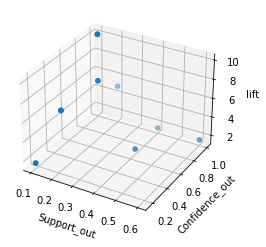

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(Support_out, Confidence_out, lift)
ax.set_xlabel("Support_out")
ax.set_ylabel("Confidence_out")
ax.set_zlabel("lift")


In [45]:
#### scatter plot for rules for support, confidence and lift
import matplotlib.pyplot as plt
import scipy as sp

Text(0, 0.5, 'Confidence')

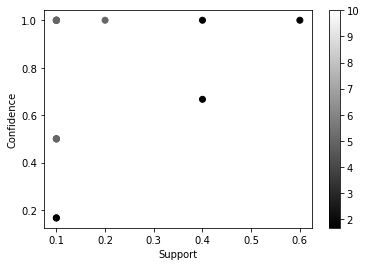

In [46]:
plt.scatter(Support_out, Confidence_out,c= lift,cmap='gray')
plt.colorbar()
plt.xlabel("Support")
plt.ylabel("Confidence")

In [48]:
######Creating the model with the dummy variables given in the data set itself#####
##importing the same dataset to work on
data_dummies = pd.read_csv("my_movies.csv")
data_dummies = data_dummies.iloc[:,5:]
data_dummies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [51]:
## applying apriori with support = 0.005, max length = 2

frequent_ori = apriori(data_dummies, min_support = 0.005, max_len=2, use_colnames = True)
frequent_ori.sort_values('support',ascending =False , inplace =True)
frequent_ori

,support,itemsets
1,0.7,(Gladiator)
0,0.6,(Sixth Sense)
4,0.6,(Patriot)
17,0.6,"(Gladiator, Patriot)"
10,0.5,"(Sixth Sense, Gladiator)"
13,0.4,"(Sixth Sense, Patriot)"
5,0.2,(LOTR2)
9,0.2,(Green Mile)
3,0.2,(Harry Potter1)
16,0.2,"(Sixth Sense, Green Mile)"


In [53]:
## Building rules with lift and minimum threshold =1
rules_ori = association_rules(frequent_ori, metric= 'lift', min_threshold =1)
rules_ori.sort_values('lift', ascending =False, inplace =True)
rules_ori

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16,(Harry Potter1),(Harry Potter2),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
30,(Green Mile),(LOTR),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
17,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
31,(LOTR),(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
19,(LOTR2),(Harry Potter1),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
10,(Green Mile),(LOTR2),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
11,(LOTR2),(Green Mile),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
23,(Harry Potter1),(LOTR1),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60


In [54]:
## Eliminating the reducdancy
def to_list_ori(i):
    return(sorted(i))
to_list_ori(i)

['V2_LOTR', 'V3_Gladiator']

In [55]:
ori_add = rules_ori.antecedents.apply(to_list_ori) + rules_ori.consequents.apply(to_list_ori)
ori_add = ori_add.apply(sorted)
ori_add

16    [Harry Potter1, Harry Potter2]
8                     [LOTR1, LOTR2]
30                [Green Mile, LOTR]
17    [Harry Potter1, Harry Potter2]
9                     [LOTR1, LOTR2]
31                [Green Mile, LOTR]
19            [Harry Potter1, LOTR2]
10               [Green Mile, LOTR2]
11               [Green Mile, LOTR2]
23            [Harry Potter1, LOTR1]
22            [Harry Potter1, LOTR1]
14       [Green Mile, Harry Potter1]
15       [Green Mile, Harry Potter1]
21               [Green Mile, LOTR1]
20               [Green Mile, LOTR1]
18            [Harry Potter1, LOTR2]
7          [Green Mile, Sixth Sense]
25               [LOTR, Sixth Sense]
24               [LOTR, Sixth Sense]
6          [Green Mile, Sixth Sense]
13             [Braveheart, Patriot]
12             [Braveheart, Patriot]
0               [Gladiator, Patriot]
1               [Gladiator, Patriot]
26           [Braveheart, Gladiator]
27           [Braveheart, Gladiator]
28                 [Gladiator, LOTR]
2

In [56]:
ori_set = list(ori_add)
unique_ori = [list(m) for m in set(tuple(i) for i in ori_set)]
index_ori = []

In [57]:
for i in unique_ori:
    index_ori.append(ori_set.index(i))
print(i)

['Green Mile', 'Harry Potter1']


In [58]:
## rules without reducdancy    
rules_without_ori = rules_ori.iloc[index_ori,:]
rules_without_ori 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
13,(Patriot),(Braveheart),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
10,(Green Mile),(LOTR2),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
19,(LOTR2),(Harry Potter1),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.80
28,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
7,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
23,(Harry Potter1),(LOTR1),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
21,(LOTR1),(Green Mile),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
26,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf


In [59]:
## Sorting
rules_without_ori.sort_values('lift', ascending = False, inplace = True)
rules_without_ori

C:\Users\sagri\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
16,(Harry Potter1),(Harry Potter2),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
30,(Green Mile),(LOTR),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
10,(Green Mile),(LOTR2),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
19,(LOTR2),(Harry Potter1),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
23,(Harry Potter1),(LOTR1),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
21,(LOTR1),(Green Mile),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
14,(Green Mile),(Harry Potter1),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
25,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
13,(Patriot),(Braveheart),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


In [60]:
Support_ori = rules_without_ori["support"]
confidence_ori = rules_without_ori["confidence"]
lift_ori = rules_without_ori["lift"]


Text(0.5, 0, 'lift')

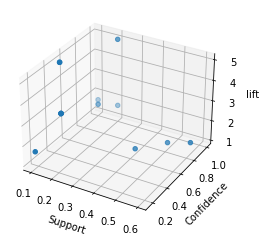

In [61]:
### plotting 3D for the rules generated
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(Support_ori,confidence_ori,lift_ori)
ax1.set_xlabel("Support")
ax1.set_ylabel("Confidence")
ax1.set_zlabel("lift")


Text(0, 0.5, 'confidence')

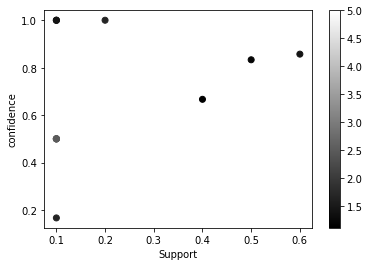

In [62]:
##Plotting the a scatter plot

plt.scatter(Support_ori,confidence_ori, c =lift_ori, cmap ='gray')
plt.colorbar()
plt.xlabel("Support")
plt.ylabel("confidence")


In [63]:
##LOTR1 , LOTR2
##PATRIOT , SIXTH SENSE
#Sixth Sense , Gladiator

### Model with other than Zero values and  model with the dummy variables given in the data set itself are giving two different values
##Considering the model with the dummy variables given in the data set itself are giving two different values